In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text

In [7]:
df = pd.read_csv("student_performance_dataset.csv") 

print(df.head())

  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_F

In [8]:
df = df.drop(columns=["Student_ID"])

df["Pass_Fail"] = df["Pass_Fail"].map({"Pass": 1, "Fail": 0})

df = pd.get_dummies(df, drop_first=True)

print("Пропуски:\n", df.isnull().sum())

Пропуски:
 Study_Hours_per_Week                    0
Attendance_Rate                         0
Past_Exam_Scores                        0
Final_Exam_Score                        0
Pass_Fail                               0
Gender_Male                             0
Parental_Education_Level_High School    0
Parental_Education_Level_Masters        0
Parental_Education_Level_PhD            0
Internet_Access_at_Home_Yes             0
Extracurricular_Activities_Yes          0
dtype: int64


In [9]:
X = df.drop("Pass_Fail", axis=1)
y = df["Pass_Fail"]

print(df.describe())

       Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
count            708.000000       708.000000        708.000000   
mean              26.132768        78.107722         77.871469   
std                8.877727        13.802802         14.402739   
min               10.000000        50.116970         50.000000   
25%               19.000000        67.550094         65.000000   
50%               27.000000        79.363046         79.000000   
75%               34.000000        89.504232         91.000000   
max               39.000000        99.967675        100.000000   

       Final_Exam_Score   Pass_Fail  
count        708.000000  708.000000  
mean          58.771186    0.500000  
std            6.705877    0.500353  
min           50.000000    0.000000  
25%           52.000000    0.000000  
50%           59.500000    0.500000  
75%           64.000000    1.000000  
max           77.000000    1.000000  


In [10]:
# 80% - обучение, 20% - тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Логистическая регрессия
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Дерево решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred_log = log_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

In [13]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print()

Logistic Regression:
Accuracy: 1.0
F1 Score: 1.0



In [14]:
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print()

SVM:
Accuracy: 0.9295774647887324
F1 Score: 0.9324324324324325



In [15]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree:
Accuracy: 1.0
F1 Score: 1.0


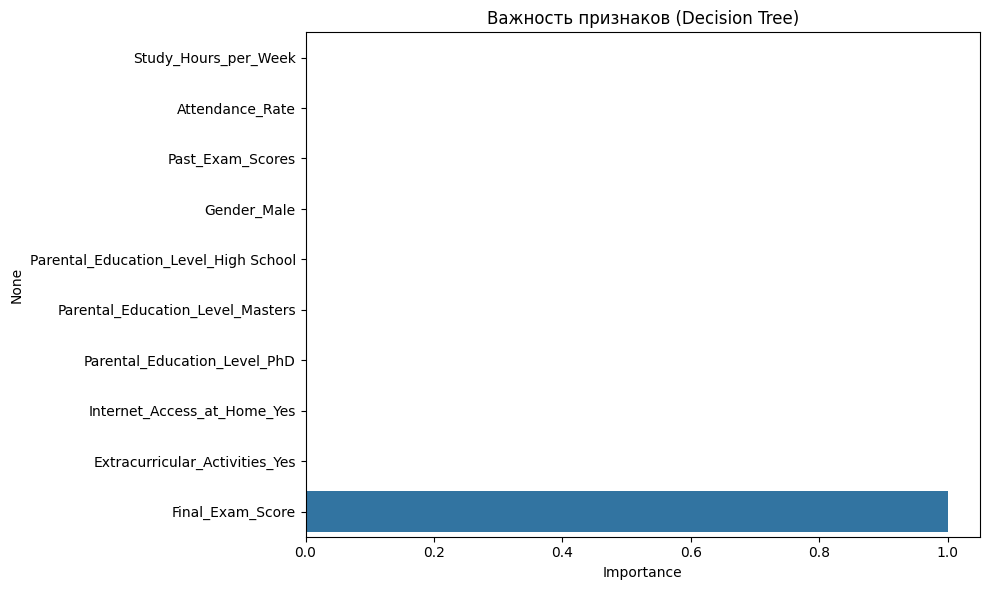

In [16]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Важность признаков (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [17]:
rules = export_text(tree_model, feature_names=list(X.columns))
print("Правила дерева решений:\n")
print(rules)

Правила дерева решений:

|--- Final_Exam_Score <= 59.50
|   |--- class: 0
|--- Final_Exam_Score >  59.50
|   |--- class: 1



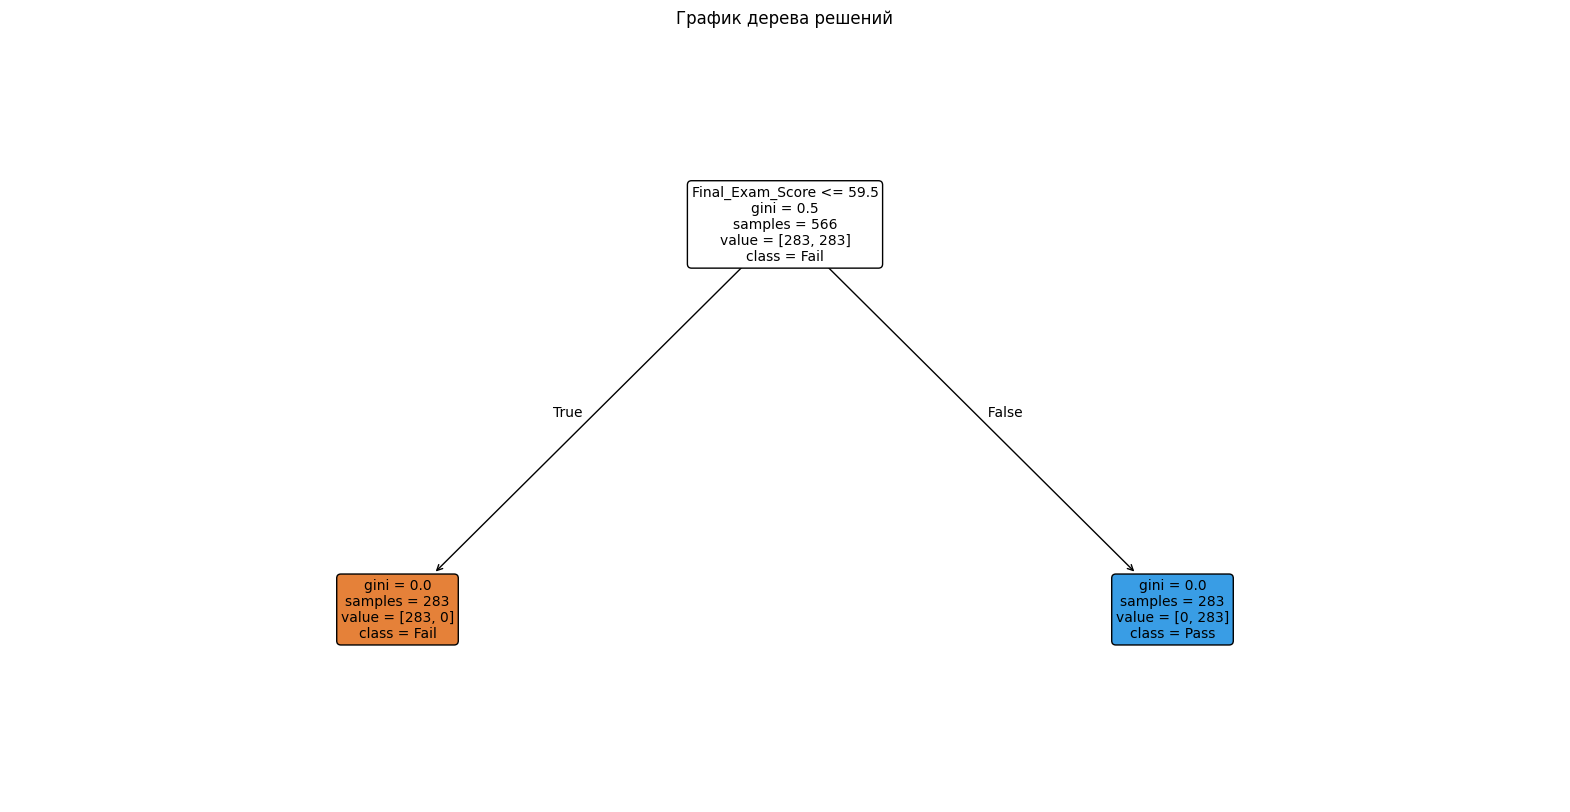

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Размер графика
plt.figure(figsize=(20, 10))

# Построение дерева
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Fail", "Pass"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("График дерева решений")
plt.show()